In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# accessing date file
mass_radius_data = "mass_radius_relationship.csv"
KOI_data = "cumulativeKOIdata.csv"
TOI_data = "cumulativeTOIdata.csv"

In [5]:
mass_radius_targets = pd.read_csv(mass_radius_data)

In [6]:
TOI_targets = pd.read_csv(TOI_data)

In [7]:
KOI_targets = pd.read_csv(KOI_data)

**Paper:** IDENTIFYING EXOPLANETS WITH MACHINE
LEARNING METHODS: A PRELIMINARY STUDY
Yucheng Jin, Lanyi Yang and Chia-En Chiang April 2022

Among these features, there is a categorical target variable, koi_disposition, with three
possible values, “CONFIRMED” (labelled as 1), “CANDIDATE” (labelled as 0), and “FALSE
POSITIVE” (labelled as -1). If an exoplanet is “CONFIRMED”, we know its existence has been
confirmed, and is associated with a name recorded by kepler_name variable; if an exoplanet is
“CANDIDATE”, its existence has not been proven yet; if an exoplanet is “FALSE POSITIVE”,
it has been proven a negative observation.

In [8]:
# classification for koi_disposition
disposition_map = {
    'CONFIRMED': 1,
    'CANDIDATE': -1,
    'FALSE POSITIVE': 0 # -1 means missing
}

KOI_targets['koi_disposition_label'] = KOI_targets['koi_disposition'].map(disposition_map)

In [9]:
KOI_targets.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_label
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,-1
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1


In [10]:
# dropping the 'candidate' rows from the koi_disposition
KOI_targets_filtered = KOI_targets[KOI_targets['koi_disposition_label'] >= 0]

In [11]:
# defining model independent (X) and dependent (y) values
x_independent = KOI_targets[['koi_fpflag_nt', 'koi_period', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']]
y_dependent = KOI_targets['koi_disposition_label'] # p before classification

In [12]:
# 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x_independent, y_dependent, 
                                                    test_size = 0.2, random_state = 45)

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Train and Evaluate Random Forest Model (classifier)

In [14]:
rfmodel = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rfmodel.fit(x_train, y_train)
y_predictrf = rfmodel.predict(x_test)

print('RMSErf:', np.sqrt(metrics.mean_squared_error(y_test,y_predictrf)))
print('R-Squaredrf: %.3f' % (metrics.r2_score(y_test,y_predictrf)))

RMSErf: 0.8287817850650553
R-Squaredrf: -0.429


### Cross Validation with Random Forest

In [15]:
def modelmetrics_rmse(model, X, Y):
    cv = RepeatedKFold(n_splits=3, n_repeats=6, random_state=1)
    scores = cross_val_score(
        model, X, Y,
        scoring='neg_root_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        error_score='raise'
    )
    return -scores  # returns an array of RMSE values

rmse_scores_rf = modelmetrics_rmse(rfmodel, x_independent, y_dependent)
print("RF Mean RMSE:", rmse_scores_rf.mean())
print("RF Std RMSE:", rmse_scores_rf.std())

RF Mean RMSE: 0.8289593546365494
RF Std RMSE: 0.014598505689376448


### Confusion Matrix for the Random Forest 
To get visualization of the data: 0 = FALSE POSITIVE, 1 = CONFIRMED

In [27]:
cm = confusion_matrix(y_test, y_predictrf, labels = [0, 1], normalize='true')
cm_percent = cm * 100 
display = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=['FALSE POSITIVE', 'CONFIRMED'])

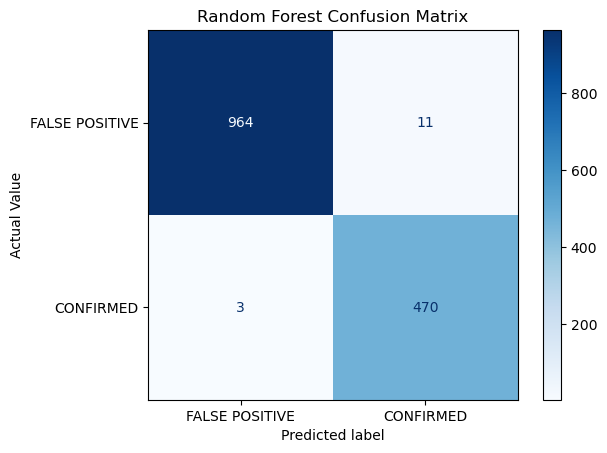

In [ ]:
display.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel("Actual Value")
plt.show()